# SCP-Accommodation Bigrams
## P Values, TTest
This notebook contains Fisher's Exact test to calculate statistical validity of part of speech tags. It also was used to generate SCP Accommodation calculations for bigram markers contains paired t-test results for those tests. 

In [1]:
import nltk
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns 
import random
import itertools

# Import the bigram code from working directory
import BigramCode as bi
import SCP_Code as scp
from collections import Counter

In [2]:
## To run when parsing pos tag results
dataA = pd.read_csv('A_Tweets_Tagged.txt', sep='\t', header=None)
dataA.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

dataB = pd.read_csv('B_Tweets_Tagged.txt', sep='\t', header=None)
dataB.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

In [3]:
tweetData = pd.read_csv('pairs_edit_utf_noSquig.csv', sep='~',)
#tweetData.head()

In [4]:
dataA = dataA.drop(dataA.index[len(dataA)-1])
len(dataA)

326167

In [5]:
dataA.fillna({'Tags':'B'}, inplace=True)
dataB.fillna({'Tags':'B'}, inplace=True)

In [6]:
countdictA = []
for tags in dataA.Tags: 
    count = Counter(tags)
    countdictA.append(count)
    
countdictB = []
for tags in dataB.Tags: 
    count = Counter(tags)
    countdictB.append(count)
    
print(len(countdictA),len(countdictB))

326167 326167


In [7]:
# Shuffle markerset B
shuffledB = random.sample(countdictB,len(countdictB))
# get shared markers in A-B and A-randB
sharedMarkers = scp.getSharedMarkers(countdictA,countdictB)
sharedRand = scp.getSharedMarkers(countdictA,shuffledB)

#Check all same length
print(len(shuffledB),len(sharedMarkers),len(sharedRand))

326167 326167 326167


In [11]:
# Markers as POS tags
markers = ['P','D','O','&','N','S','^','Z','L','M','V','A','R','!','T','X','Y','#','U','E','$',',','G']

In [24]:
# Use fishers to find statistical significance of pos tag results:
fishScore = scp.getFishersPVal(countdictA,countdictB,sharedMarkers,markers)
fishScorerand = scp.getFishersPVal(countdictA,countdictB,sharedRand,markers)
fishScore

{'P': 1.801005643683318e-204,
 'D': 2.9732324841969283e-148,
 'O': 1.2951119546240638e-83,
 '&': 3.406948473268464e-144,
 'N': 6.0665847596775444e-83,
 'S': 5.6412203644346795e-09,
 '^': 0.0,
 'Z': 9.141407132866083e-73,
 'L': 2.291897375612644e-115,
 'M': 1.0,
 'V': 1.348940219066829e-75,
 'A': 3.234683437561221e-176,
 'R': 1.4877045233658136e-125,
 '!': 3.7247995049390225e-153,
 'T': 5.592783395674315e-84,
 'X': 1.7292169980452784e-32,
 'Y': 1.0,
 '#': 0.0,
 'U': 2.529536699476284e-103,
 'E': 0.0,
 '$': 0.0,
 ',': 4.510775300295923e-23,
 'G': 7.439356273303634e-96}

In [27]:
# Convert to dataframes
fishScoreDF = pd.DataFrame.from_dict(fishScore, orient='index')
fishScoreDF.columns = ['P-Score POS Tags']
fishScoreDF.head()

fishScorerandDF = pd.DataFrame.from_dict(fishScorerand, orient='index')
fishScorerandDF.columns = ['P-Score POS Randomized Baseline']
#fishScorerandDF.head()

In [39]:
#with open ('P_Score_POS.tex','w') as tf:
#    tf.write(fishScoreDF.to_latex())
    
with open ('P_Score_POS_rand.tex','w') as tf2:
    tf2.write(fishScorerandDF.to_latex())

In [29]:
fishScoreDF.head()

,P-Score POS Tags
P,1.801006e-204
D,2.973232e-148
O,1.295112e-83
&,3.406948e-144
N,6.066585e-83


# Bigrams - Accommodation and Ttest

In [8]:
bigramsA = bi.AllBigramsinTweetset(dataA.Tags)

bigramsB = bi.AllBigramsinTweetset(dataB.Tags)

In [9]:
print(bigramsA[0:1],len(bigramsA))
print(bigramsB[0:1],len(bigramsB))

[[['V', 'O'], ['O', 'V'], ['O', 'O'], ['O', 'N'], ['N', 'L'], ['L', 'V'], ['V', 'P'], ['P', ','], [',', 'V'], ['V', 'V'], ['P', '^'], ['^', 'P'], ['^', 'N'], ['N', '&'], ['&', 'V'], ['O', 'P'], ['P', 'V'], ['V', 'N'], ['N', ',']]] 326167
[[['V', 'V'], ['V', 'P'], ['P', 'D'], ['D', 'N'], ['N', 'P'], ['P', 'O'], ['O', 'V'], ['V', 'N'], ['P', 'A'], ['A', ','], [',', 'V'], ['P', 'V'], ['V', 'O'], ['O', 'P'], ['P', ','], ['P', '^'], ['^', 'R'], ['R', ',']]] 326167


In [10]:
tupleBigramsA = bi.convertToTuples(bigramsA)
tupleBigramsB = bi.convertToTuples(bigramsB)

In [1]:
print('A Bigrams: ',tupleBigramsA[0:2],'\n B Bigrams: ',tupleBigramsB[0:2])

In [11]:
# Scramble replies in tupleBigramsB for random 
shuffledBigB = random.sample(tupleBigramsB,len(tupleBigramsB))
#print(shuffledBigB[0:2])

In [12]:
# First make list of lists by flattening: 

singleListBigramsA = [y for x in tupleBigramsA for y in x]
len(singleListBigramsA)

3863782

In [13]:
# Make single list of bigrams for b_tweets
singleListBigramsB = [y for x in tupleBigramsB for y in x]
len(singleListBigramsB)

3815722

In [14]:
bigramsFreqA = Counter(singleListBigramsA)
bigramsFreqB = Counter(singleListBigramsB)

In [15]:
# Set the topBigrams to use as markers
totalBigramFreq = bigramsFreqB+bigramsFreqA
topBigrams = totalBigramFreq.most_common(50)
topBigrams[0:10]

[(('O', 'V'), 339790),
 (('N', ','), 329800),
 (('D', 'N'), 304439),
 (('V', 'O'), 223508),
 (('N', 'P'), 221975),
 (('A', 'N'), 217495),
 (('V', 'V'), 217285),
 (('V', 'P'), 212797),
 (('V', 'D'), 206326),
 (('P', 'D'), 185236)]

In [16]:
bigMarks = []
for bigram,count in topBigrams:
    bigMarks.append(bigram)

In [17]:
# Get shared bigrams between A-B and A-Brand

sharedABBig = scp.getSharedMarkers(tupleBigramsA,tupleBigramsB)
sharedARandBig = scp.getSharedMarkers(tupleBigramsA,shuffledBigB)
print('Length Shared: ',len(sharedABBig), 'Length Shared Rand: ',len(sharedARandBig))

Length Shared:  326167 Length Shared Rand:  326167


### Pairs for Bigrams Accomodation

In [24]:
bigramDF = pd.DataFrame()
bigramDF['BigA'] = tupleBigramsA
#bigramDF
bigramDF['BigB'] = tupleBigramsB
bigramDF.head()

,BigA,BigB
0,"[(V, O), (O, V), (O, O), (O, N), (N, L), (L, V...","[(V, V), (V, P), (P, D), (D, N), (N, P), (P, O..."
1,"[(V, O), (O, V), (O, O), (O, N), (N, L), (L, V...","[(!, ,), (,, O), (O, V), (V, V), (V, O), (O, D..."
2,"[(!, ,), (,, O), (O, V), (V, V), (V, O), (O, D...","[(V, ,)]"
3,"[(R, V), (V, V), (V, O), (O, R), (R, P), (P, O...","[(O, V), (V, A), (A, ,), (,, O), (V, N), (N, P..."
4,"[(!, ,), (,, L), (L, O), (O, V), (V, ,), (,, G...","[(^, ^), (^, V), (V, A), (A, P), (P, V), (V, V..."


In [25]:
sam = (bigramDF['BigA'][0])
('V', 'O') in sam

True

In [26]:
pairs = []
for i in range(len(tweetData)):
    pairs.append(tuple([tweetData.a_username[i],tweetData.b_username[i]]))

In [27]:
pairs = pairs[:-1]
len(pairs)

326167

In [5]:
bigramDF['Pairs'] = pairs
bigramDF.head()

In [29]:
unCount = Counter(bigramDF['Pairs'])
len(unCount)

69148

In [30]:
for k in list(unCount):
    if unCount[k] < 10: # Delete tweet-reply username pairs with fewer than 10 messages
        del unCount[k]
len(unCount)

7392

In [ ]:
# Generate list of tuple usernames top 
countList = []
for item in list(unCount):
    countList.append(item)
countList[0:5]

In [4]:
# Generate new df with only enough to study
toTestAcc = bigramDF[bigramDF['Pairs'].isin(countList)]
toTestAcc = toTestAcc.reset_index()
toTestAcc[0:20]

In [33]:
toTestAcc.fillna({'Tags':'B'}, inplace=True)
toTestAcc.fillna({'Tags_B':'B'}, inplace=True)

In [34]:
def getSharedMarkers(ATweet,BTweet):
	sharedMarkers = []
	for i in range(len(ATweet)):
		tempmarker = []
		for tag in ATweet[i]:
			if tag in BTweet[i] and (tag not in tempmarker):
				tempmarker.append(tag)
		sharedMarkers.append(tempmarker)
	return sharedMarkers
shared = getSharedMarkers(toTestAcc['BigA'],toTestAcc['BigB'])
print(len(shared),shared[0:5])

174858 [[('V', 'V'), ('A', 'N'), ('N', 'E')], [('N', 'R'), ('R', 'R'), ('R', ',')], [('V', 'O'), ('V', 'R')], [('R', 'V'), ('D', 'N'), ('N', 'P'), ('P', 'D'), ('N', ','), (',', 'V')], [('V', ','), ('V', 'V'), ('V', 'D'), ('D', 'N'), ('N', 'P'), ('P', 'D'), ('N', ',')]]


In [35]:
def UNIterateforSCPPairScore(dataframe,userPair,shared):
    tempA = []
    tempB = []
    tempsh = []
    for num in range(len(dataframe)):
        if dataframe['Pairs'][num] == userPair: # check to see if the row matches UN pairs to be calc.
            tempA.append(dataframe['BigA'][num])
            tempB.append(dataframe['BigB'][num])
            tempsh.append(shared[num])
    return([tempA,tempB,tempsh])

def calculateAccom(markerset,UNTweetTagsA,UNTweetTagsB,SharedABTags):
    minDict= {}
    for marker in markerset:
        minDict[marker] = getMin(marker,UNTweetTagsB)
        marker2 = str(marker)+'2'
        minDict[marker2] = getSub(marker,UNTweetTagsA,SharedABTags)
    return minDict

def getMin(marker,listB):
    numerator = scp.countMarkers(marker,listB)#b's replies to A in which marker is present
    denom = len(listB) # number of b's replies to A
    if denom == 0:
        return np.nan
    else:
        return (numerator/denom)

def getSub(marker,listA,shared):
    numerator = scp.countMarkers(marker,shared) #b and a show marker
    denom = scp.countMarkers(marker,listA) # a shows marker
    if denom == 0:
        return np.nan
    else:
        return(numerator/denom)

def getAcc(marker,listA,listB,shared):
    minuend = getMin(marker,listB)
    subtrahend = getSub(marker,listA,shared)
    if subtrahend == 0:
        return np.nan
    else:
        return([minuend,subtrahend])

# Call upon this function
def fullForm(usernameList,dataframe,markers,shared):
    minDict = {}
    for userPair in usernameList:
        temp = UNIterateforSCPPairScore(dataframe,userPair,shared)# temp consists of [A_lst,B_lst,Shared]
        minDict[userPair] = calculateAccom(markers,temp[0],temp[1],temp[2])
    return minDict

In [62]:
allScores = fullForm(countList,toTestAcc,bigMarks,shared)
len(allScores)

7392

In [63]:
#Write df to CSV
allScoresDF = pd.DataFrame.from_dict(allScores,orient='index')
allScoresDF.to_csv('SCP_Acc_Scores_Big.csv',sep = '~')

In [3]:
allScoresDF.head() # next find mean of each column and then subtract minuend (big)from sub(big2)

In [ ]:
meanscol = allScoresDF.mean(axis = 0)
meanscol

In [71]:
# Acc(C) = mean of the set of b|a estimations - mean of set of b estimations
#marker2 - marker = AccC
meanDF = meanscol.to_frame()#.reset_index()
meanDF.columns=['Score']
meanDF=meanDF.reset_index()

In [72]:
meanDF.head()

,index,Score
0,"(O, V)",0.517275
1,"('O', 'V')2",0.548173
2,"(N, ,)",0.493560
3,"('N', ',')2",0.514074
4,"(D, N)",0.460069


In [76]:
# Calculate average difference between minuend and subtrahend estimations for
scoreDictBi = {}
for i in range(len(meanDF)):
    if i%2 == 1:
        scoreDictBi[meanDF['index'][i-1]]= (meanDF['Score'][i] - meanDF['Score'][i-1])
scoreDictBi

{('O', 'V'): 0.030898190622264177,
 ('N', ','): 0.02051366609005345,
 ('D', 'N'): 0.028085578330963812,
 ('V', 'O'): 0.019047583313237693,
 ('N', 'P'): 0.027950191491281917,
 ('A', 'N'): 0.03135813937657472,
 ('V', 'V'): 0.03556493041799569,
 ('V', 'P'): 0.03161098658192474,
 ('V', 'D'): 0.021482543746008997,
 ('P', 'D'): 0.02505376905814588}

In [74]:
scoreDictDF = pd.DataFrame.from_dict(scoreDictBi, orient='index')
scoreDictDF.columns = ['Accommodation']
scoreDictDF.head()

,Accommodation
"(O, V)",0.030898
"(N, ,)",0.020514
"(D, N)",0.028086
"(V, O)",0.019048
"(N, P)",0.027950


In [77]:
# Calculate average difference between minuend and subtrahend estimations for
ScoreListBAvg = {}
ScoreListBGivA = {}
for i in range(len(meanDF)):
    if i%2 == 0:
        ScoreListBAvg[meanDF['index'][i]] = meanDF['Score'][i]
    elif i%2 == 1:
        ScoreListBGivA[meanDF['index'][i-1]] = meanDF['Score'][i]
len(ScoreListBGivA)

10

In [78]:
ScoreListBGivA = pd.DataFrame.from_dict(ScoreListBGivA,orient='index')
ScoreListBAvg = pd.DataFrame.from_dict(ScoreListBAvg,orient='index')
ScoreListBAvg.columns = ['B']
ScoreListBGivA.columns = ['B|A']
ScoreListBAvg.head()

,B
"(O, V)",0.517275
"(N, ,)",0.493560
"(D, N)",0.460069
"(V, O)",0.325615
"(N, P)",0.333524


In [79]:
scoreDictDF['BAvg'] = ScoreListBAvg['B']
scoreDictDF['BGivenA'] = ScoreListBGivA['B|A']
scoreDictDF.head()

,Accommodation,BAvg,BGivenA
"(O, V)",0.030898,0.517275,0.548173
"(N, ,)",0.020514,0.493560,0.514074
"(D, N)",0.028086,0.460069,0.488155
"(V, O)",0.019048,0.325615,0.344663
"(N, P)",0.027950,0.333524,0.361474


In [81]:
# Create Visualizations and save tables
with open ('SCP_Bigram_Accomodation.tex','w') as tf:
    tf.write(scoreDictDF.to_latex())

In [80]:
scoreToPlotBar = scoreDictDF.copy()
scoreToPlotBar = scoreToPlotBar.drop(['Accommodation'], axis = 1)
scoreToPlotBar

,BAvg,BGivenA
"(O, V)",0.517275,0.548173
"(N, ,)",0.493560,0.514074
"(D, N)",0.460069,0.488155
"(V, O)",0.325615,0.344663
"(N, P)",0.333524,0.361474
"(A, N)",0.327791,0.359149
"(V, V)",0.338575,0.374140
"(V, P)",0.324715,0.356326
"(V, D)",0.308320,0.329802
"(P, D)",0.279636,0.304690


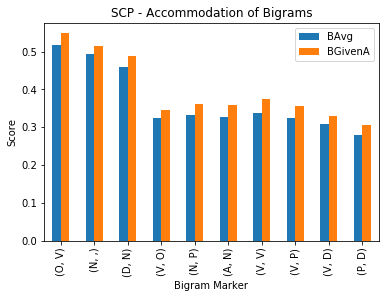

In [88]:
# Visualize dataframe to horizontal bar chart
plot1 = scoreToPlotBar.plot(kind = 'bar')#,figsize = (15,7))#, stacked = True)#,figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.ylabel('Score')
plt.xlabel('Bigram Marker')
plt.title('SCP - Accommodation of Bigrams')
plt.savefig('Accommodation_AllVals_Bigrams_2')

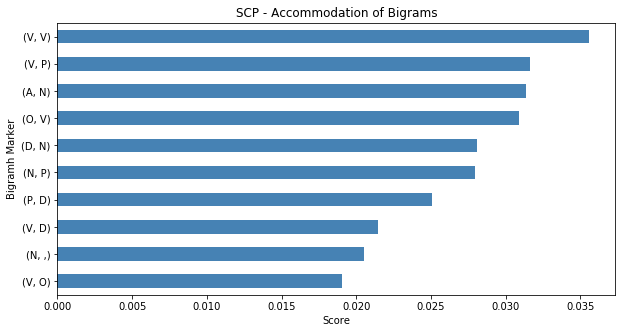

In [87]:
# Visualize just accommodation score
# Visualize dataframe to horizontal bar chart
plot1 = scoreDictDF['Accommodation'].sort_values().plot(kind = 'barh',color='steelblue',figsize = (10,5))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('Score')
plt.ylabel('Bigramh Marker')
plt.title('SCP - Accommodation of Bigrams')
plt.savefig('Accommodation_Diff_Score_Bigrams')

## 2-Tailed T Test for Bigrams

In [91]:
from scipy import stats

In [94]:
allScoresDF.fillna(0.0000001, inplace=True)
allScoresDF.fillna(0.0000001, inplace=True)

In [95]:
TTestDictbi = {}
for marker in bigMarks:
    marker2 = str(marker)+'2'
    TTestDictbi[marker] = (stats.ttest_rel(allScoresDF[marker],allScoresDF[marker2]))
TTestDictbi

{('O',
  'V'): Ttest_relResult(statistic=-19.08273589412049, pvalue=2.7699236755935764e-79),
 ('N',
  ','): Ttest_relResult(statistic=-10.876817751870984, pvalue=2.39370596243552e-27),
 ('D',
  'N'): Ttest_relResult(statistic=-15.239604761867007, pvalue=1.170766146559983e-51),
 ('V',
  'O'): Ttest_relResult(statistic=-7.084211364077734, pvalue=1.5272678229890373e-12),
 ('N',
  'P'): Ttest_relResult(statistic=-9.488529216004553, pvalue=3.094104417194374e-21),
 ('A',
  'N'): Ttest_relResult(statistic=-11.611911938740631, pvalue=6.641766050451755e-31),
 ('V',
  'V'): Ttest_relResult(statistic=-13.085284890006346, pvalue=1.0734694239727309e-38),
 ('V',
  'P'): Ttest_relResult(statistic=-11.447700920858129, pvalue=4.325140595692763e-30),
 ('V',
  'D'): Ttest_relResult(statistic=-7.023367279585012, pvalue=2.3585421711033317e-12),
 ('P',
  'D'): Ttest_relResult(statistic=-6.860274329157498, pvalue=7.428523435481976e-12)}

In [97]:
TTestDF = pd.DataFrame.from_dict(TTestDictbi,orient='index')
TTestDF =TTestDF.drop('statistic',axis=1)

with open ('Accom_TTest_Big.tex','w') as tf:
    tf.write(TTestDF.to_latex())

# PScore for Bigrams

In [61]:
# Get P-score for bigrams in dataset (for cohesion validation)

# Use fishers to find statistical significance of pos tag results:
fishScore = scp.getFishersPVal(tupleBigramsA,tupleBigramsB,sharedABBig,bigMarks)
fishScorerand = scp.getFishersPVal(tupleBigramsA,tupleBigramsB,sharedARandBig,bigMarks)
fishScore

{('O', 'V'): 4.7350694024003633e-153,
 ('N', ','): 1.5638300677818942e-124,
 ('D', 'N'): 1.8107735969407665e-144,
 ('V', 'O'): 4.995661094127605e-61,
 ('N', 'P'): 9.573099566352137e-220,
 ('A', 'N'): 3.0735006032162706e-197,
 ('V', 'V'): 7.397201130781173e-202,
 ('V', 'P'): 2.5623199781245034e-165,
 ('V', 'D'): 4.75274847230095e-106,
 ('P', 'D'): 1.8734303618993677e-104,
 ('P', 'V'): 4.3494634858653287e-194,
 ('R', 'V'): 1.570057461672647e-68,
 ('N', 'V'): 1.163810751542397e-307,
 (',', 'V'): 1.4535368248603946e-117,
 ('D', 'A'): 8.702801725223236e-94,
 ('V', ','): 2.325727290195508e-59,
 ('V', 'R'): 1.7742921802975945e-96,
 ('A', ','): 1.2571829672079938e-93,
 (',', 'O'): 5.5533277964079204e-83,
 ('N', 'N'): 4.8650573402608443e-188,
 ('P', 'N'): 5.930404120628807e-210,
 ('P', 'O'): 1.8055092279696015e-73,
 ('R', ','): 1.807318325022809e-54,
 ('V', 'A'): 2.742667473785224e-126,
 ('V', 'N'): 1.964907074032021e-167,
 ('!', ','): 7.182528892362102e-30,
 ('R', 'A'): 5.978311370187701e-106,

In [62]:
fishScorerand

{('O', 'V'): 0.7269079992099781,
 ('N', ','): 0.5727896116263653,
 ('D', 'N'): 0.5338979711959402,
 ('V', 'O'): 0.41822583385381634,
 ('N', 'P'): 0.26674078626076225,
 ('A', 'N'): 0.8233664005124062,
 ('V', 'V'): 0.6269295215599368,
 ('V', 'P'): 1.0,
 ('V', 'D'): 0.5249904019099864,
 ('P', 'D'): 0.4869920991040376,
 ('P', 'V'): 0.8772756160595181,
 ('R', 'V'): 0.8343387448898363,
 ('N', 'V'): 0.458520689676635,
 (',', 'V'): 0.2919261292066073,
 ('D', 'A'): 0.6855038539954322,
 ('V', ','): 0.6626910921747249,
 ('V', 'R'): 0.1625500343464693,
 ('A', ','): 0.8748558807088566,
 (',', 'O'): 0.5018180528878244,
 ('N', 'N'): 0.5909388465481618,
 ('P', 'N'): 0.8584073742521898,
 ('P', 'O'): 0.03573642563740696,
 ('R', ','): 0.5039411066843045,
 ('V', 'A'): 0.8660915849141463,
 ('V', 'N'): 0.6168759579578226,
 ('!', ','): 0.6283683450290465,
 ('R', 'A'): 0.6256434942038467,
 ('O', ','): 0.696541967372974,
 (',', 'R'): 0.1372445493584123,
 ('^', ','): 0.3570641070277159,
 ('A', 'P'): 0.427365047

In [63]:
# Convert to dataframes
fishScoreDFBig = pd.DataFrame.from_dict(fishScore, orient='index')
fishScoreDFBig.columns = ['P-Score Bigrams']
#fishScoreDFBig.head()

fishScorerandDFBig = pd.DataFrame.from_dict(fishScorerand, orient='index')
fishScorerandDFBig.columns = ['P-Score Bigrams Randomized Baseline']

In [64]:
with open ('P_Score_Bigram.tex','w') as tf:
    tf.write(fishScoreDFBig.to_latex())
    
with open ('P_Score_Bigram_rand.tex','w') as tf2:
    tf2.write(fishScorerandDFBig.to_latex())